Step 1: Import necessary Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

Step 2: load and explore the dataset

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


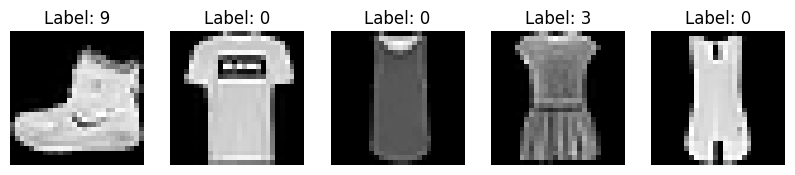

In [2]:
#load the dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

#print the shape of the data
print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_test shape: {y_test.shape}')

#visualize some sample images with their labels
fig, axes = plt.subplots(1,5, figsize = (10,2))
for i in range(5):
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].set_title(f'Label: {y_train[i]}')
    axes[i].axis('off')
plt.show()


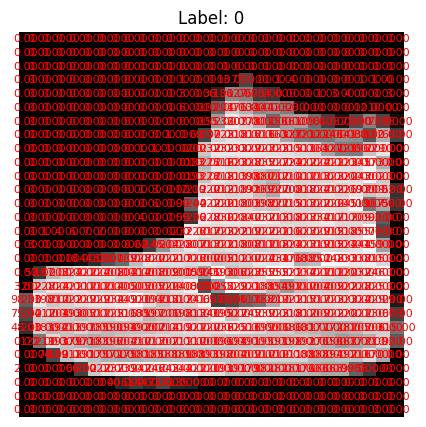

In [3]:
#Display a Sample Image with Pixel Values
# Choose an image index to display
image_index = 0

# Display the image
plt.figure(figsize=(5, 5))
plt.imshow(x_train[image_index].reshape(28, 28), cmap='gray')

# Overlay the pixel values
for i in range(28):
    for j in range(28):
        plt.text(j, i, f'{x_train[image_index][i, j]:.2f}', 
                 ha='center', va='center', color='red', fontsize=8)

plt.title(f'Label: {y_train[image_index].argmax()}')
plt.axis('off')
plt.show()

Step 3: Preprocess the data - by normalizing the pixel values and one-hot encoding the labels

In [4]:
#normalize the pixel values to the range [0,1], because neural network performs better when input data is scaled 

#to smaller and more uniform ranges. REMEMBER, normalizing or scaling helps the model to converge faster!
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

#Reshape the data to include the channel dimension (for grayscale images, it's 1) - from (60000,28,28) to (60000,28,28,1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

#one-hot encode the labels
#In this case, to_categorical(y_train, 10) converts the labels in y_train to a matrix where each label is represented by a one-hot vector.
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

#print the new shape of the data
print(f'x_train shape after preprocessing: {x_train.shape}')
print(f'y_train shape after preprocessing: {y_train.shape}')

x_train shape after preprocessing: (60000, 28, 28, 1)
y_train shape after preprocessing: (60000, 10)


Step 4: Build the CNN model - using Sequential from Keras.

In [7]:
#This model will have several convolutional and pooling layers followed by fully connected layers:

#Initialize the mode
model = Sequential()

#add the first convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

#add a pooling layer
model.add(MaxPooling2D((2, 2)))

#add the second convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))

#add another pooling layer
model.add(MaxPooling2D((2,2)))

#Flatten the output from the convolutional layers
model.add(Flatten())

#add a fully connected layer 
model.add(Dense(128, activation='relu'))

#add the output layer
model.add(Dense(10, activation='softmax'))

#print the model summary
model.summary


<bound method Model.summary of <Sequential name=sequential_2, built=True>>

Step 5: Compile the model before training - determine the optimizer, loss function, evaluation metric

In [12]:
#compile the model
model.compile(optimizer= 'adam',
             loss= 'categorical_crossentropy',
             metrics= ['accuracy'])

Step 6: Train the model

In [13]:
# start with t small number of epochs to see how it performs
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7722 - loss: 0.6154 - val_accuracy: 0.8765 - val_loss: 0.3428
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8842 - loss: 0.3133 - val_accuracy: 0.8921 - val_loss: 0.2935
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9046 - loss: 0.2593 - val_accuracy: 0.8792 - val_loss: 0.3198
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9156 - loss: 0.2248 - val_accuracy: 0.9048 - val_loss: 0.2583
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9274 - loss: 0.1931 - val_accuracy: 0.9036 - val_loss: 0.2703
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9376 - loss: 0.1682 - val_accuracy: 0.9112 - val_loss: 0.2455
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9441 - loss: 0.1512 - val_accuracy: 0.9142 - val_loss: 0.2557
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9483 - loss: 0

Step 7: Evaluate the model on the test data

In [15]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9102 - loss: 0.2896
Test accuracy: 0.9136000275611877


Step 8: Visualize the training process

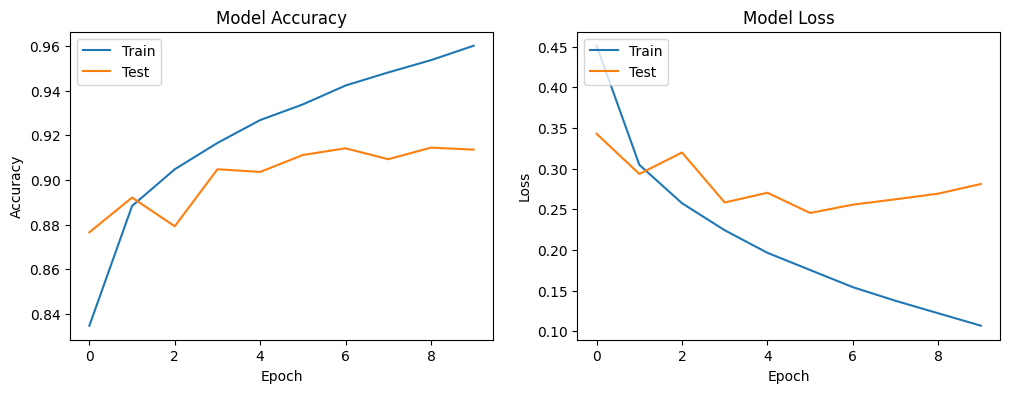

In [19]:
#plot training and validation accuracy values

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

#plot training and validation loss values
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()